# Phase2Pro - Iteration 

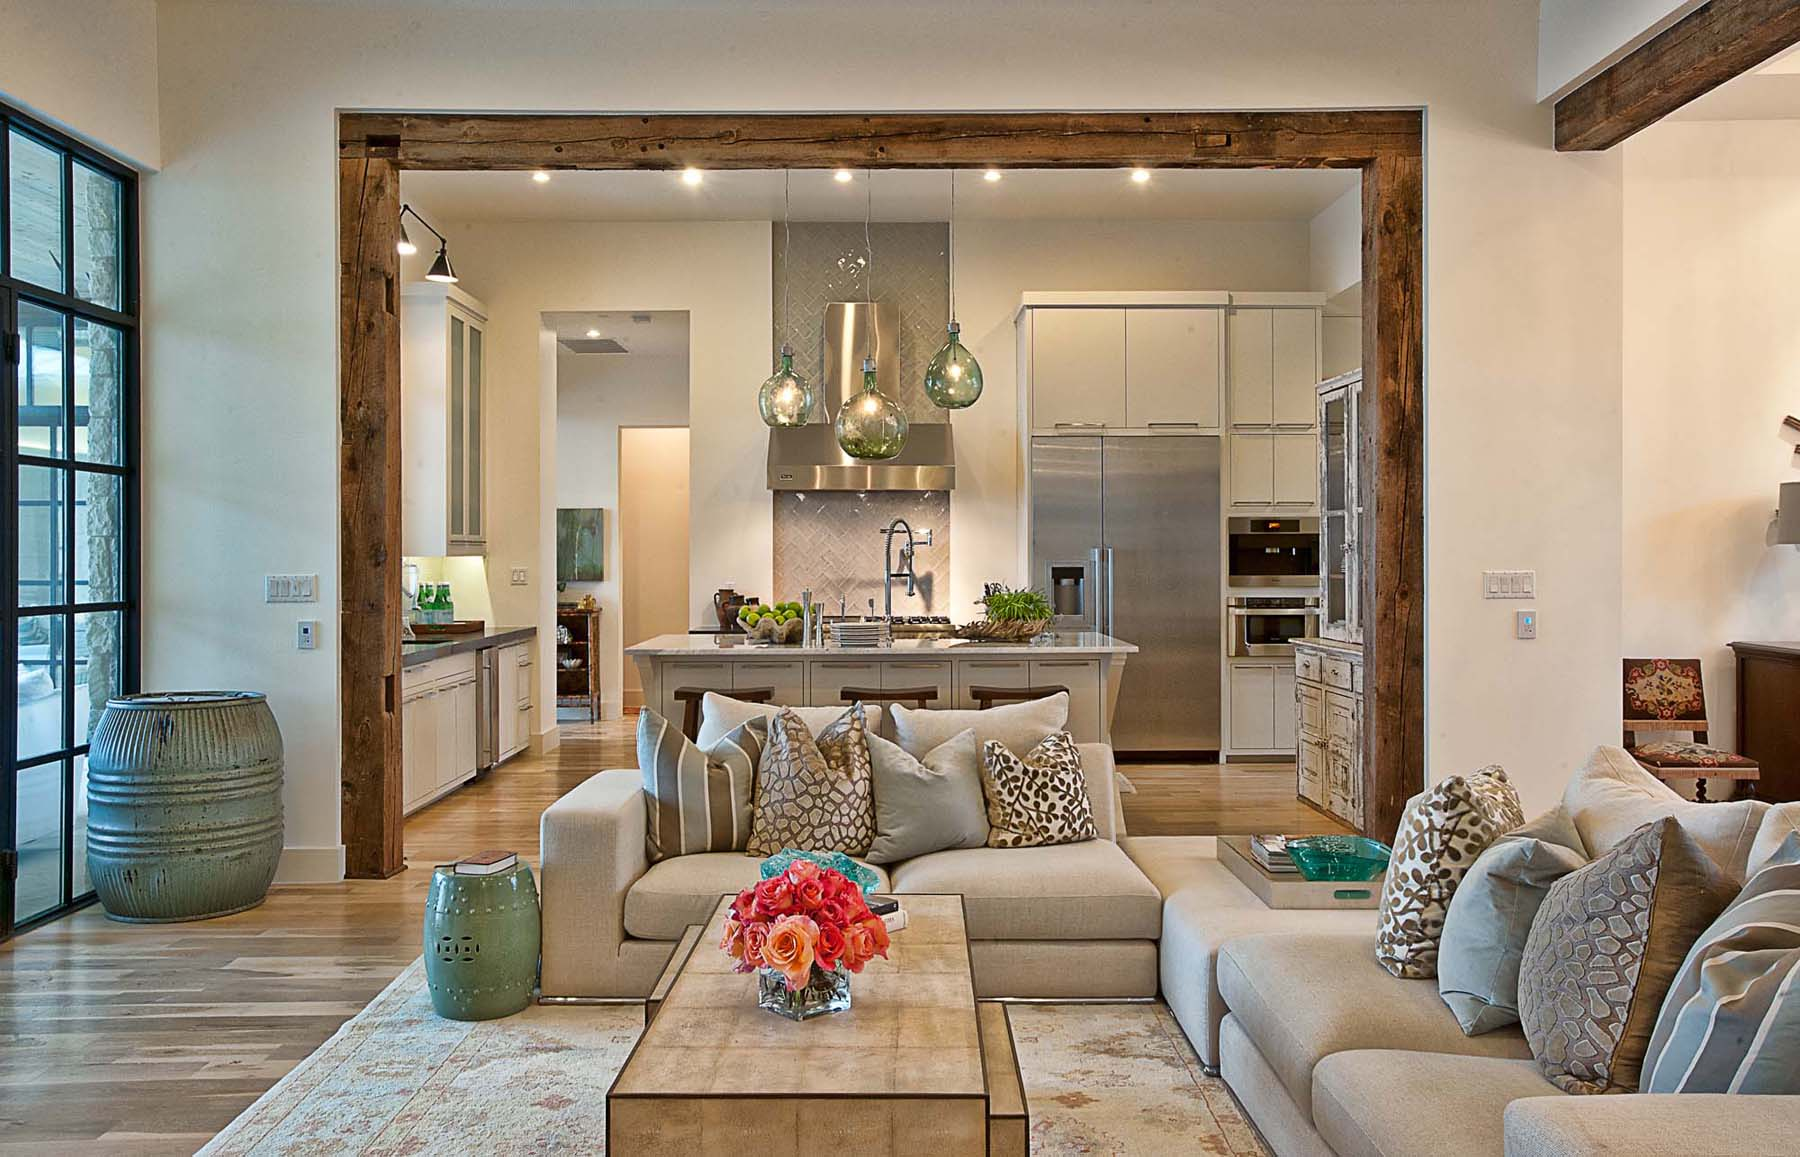

BUSINESS PROBLEM: 
King County Realty is a newly established local business in Northwestern America.
They are seeking some information regarding what attracts local buyers in this area to purchase new homes.
We will inspect the data set to determine what relationships and connections buyers have to purchasing a home and help King County Realty market their new business to suit.

What makes buyers in this area buy particular homes? 

A linear regression model will be used to understand the connections to the business problem usingthe OSMIN Model a our Data Science Process. 

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

**OBTAIN** - Data has been sourced from kc_house_data.csv.

In [2]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**SCRUB**: During this stage, we'll focus on cleaning the data. 

#Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration. This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded.

In [3]:
#refined dataset and drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

In [4]:
#Removed duplicates, show completed - Scrub
data.drop_duplicates(inplace=True)
#Show unique values for column data
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

In [5]:
#Look at correlations between variables to identify best predictor for response (score)
data.corr()
#Can see the strongest predictor of price is sqft_lot at 89% and sqft_living with a 70% correlation - 
#with grade in close second at 67%

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,1.000000,0.308838,0.525936,0.701940,0.089868,0.256952,0.036038,0.668078,0.054018,-0.053381
bedrooms,0.308838,1.000000,0.514590,0.578208,0.032453,0.178172,0.026423,0.356783,0.155875,-0.154142
bathrooms,0.525936,0.514590,1.000000,0.755827,0.088393,0.502822,-0.126429,0.665892,0.507240,-0.204785
sqft_living,0.701940,0.578208,0.755827,1.000000,0.173427,0.354342,-0.059543,0.763030,0.318462,-0.199750
sqft_lot,0.089868,0.032453,0.088393,0.173427,1.000000,-0.004657,-0.008887,0.114829,0.053093,-0.129583
floors,0.256952,0.178172,0.502822,0.354342,-0.004657,1.000000,-0.263965,0.458702,0.488982,-0.059709
condition,0.036038,0.026423,-0.126429,-0.059543,-0.008887,-0.263965,1.000000,-0.146780,-0.361416,0.002913
grade,0.668078,0.356783,0.665892,0.763030,0.114829,0.458702,-0.146780,1.000000,0.447754,-0.185850
yr_built,0.054018,0.155875,0.507240,0.318462,0.053093,0.488982,-0.361416,0.447754,1.000000,-0.347446
zipcode,-0.053381,-0.154142,-0.204785,-0.199750,-0.129583,-0.059709,0.002913,-0.185850,-0.347446,1.000000


In [6]:
#Show current types - Scrub
print(data.dtypes)
data = data.astype("int64", errors='ignore')
data.info()

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21589 non-null  int64
 1   bedrooms     21589 non-null  int64
 2   bathrooms    21589 non-null  int64
 3   sqft_living  21589 non-null  int64
 4   sqft_lot     21589 non-null  int64
 5   floors       21589 non-null  int64
 6   condition    21589 non-null  int64
 7   grade        21589 non-null  int64
 8   yr_built     21589 non-null  int64
 9   zipcode      21589 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


In [7]:
population_mean = data.sqft_lot.mean()
population_mean

15103.896197137432

In [8]:
population_mean = data.sqft_living.mean()
population_mean

2080.4155356894717

In [9]:
# Take a sample of 50 records
sample = data.sample(n=50, random_state=22)
# Calculate the sample mean
sample_mean = sample.sqft_lot.mean()
sample_mean

9925.96

In [10]:
# Find the difference between the sample and population means
err = np.abs(sample_mean - population_mean)
# Divide by the population mean to find a percent error
per_err = err / population_mean
per_err

3.7711429902922884

In [11]:
five_sample_means = []
for i in range(5):
    sample = data.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.sqft_lot.mean())
    
five_sample_means

[8854.38, 14481.8, 10178.66, 11351.08, 8747.14]

In [12]:
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

[3.2560631989635493,
 5.961013197394999,
 3.892609108798394,
 4.456159985960753,
 3.2045158046279947]

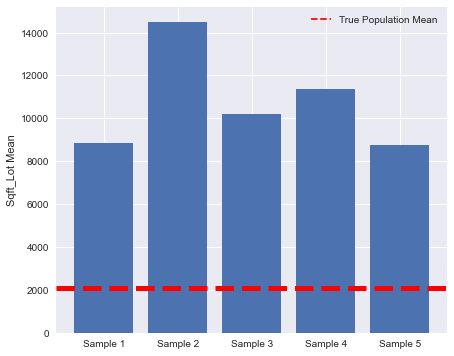

In [13]:
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Sqft_Lot Mean")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="medium"
);
#Roughly displays the mean at 2000 across all samples for Sqft_lot

In [14]:
#to view statistics - Scrub
#lamba function to remove exponential values - Scrub
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21589,21589,21589,21589,21589,21589,21589,21589,21589,21589
mean,"540,308.35",3.37,1.75,"2,080.42","15,103.90",1.45,3.41,7.66,"1,970.99","98,077.95"
std,"367,428.32",0.93,0.73,918.23,"41,419.63",0.55,0.65,1.17,29.37,53.52
min,78000,1,0,370,520,1,1,3,1900,98001
25%,322000,3,1,1430,5042,1,3,7,1951,98033
50%,450000,3,2,1910,7620,1,3,7,1975,98065
75%,645000,4,2,2550,10688,2,4,8,1997,98118
max,7700000,33,8,13540,1651359,3,5,13,2015,98199


In [15]:
# Your solution here
import math
import scipy.stats as stats
mu = 150
sigma = 100
n=21
x_bar = 151
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = 1 - stats.norm.cdf(z)

p,z

# (p = 0.48, z = 0.45)

(0.48172456464754565, 0.04582575694955839)

                                            **  HYPOTHESIS **

Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - when comparing sqft_lot against sqft_living does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living DOES affect a buyers decision when purchasing a home. 
𝜇1≠𝜇2μ1≠μ2


#alpha value is 0.35 

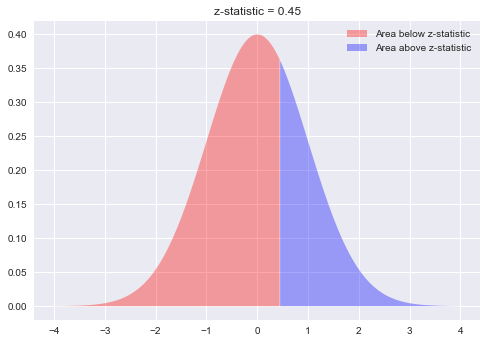

In [16]:
#running z test 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,0.45,0.01),
                 y1= stats.norm.pdf(np.arange(-4,0.45,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(0.45,4,0.01), 
                 y1= stats.norm.pdf(np.arange(0.45,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 0.45');

In [17]:
#show norm with degree of freedom
stats.norm.cdf(z)

0.5182754353524544

In [18]:
#Pvalue minus degree of freedom 
pval = 1 - stats.norm.cdf(z)
pval

0.48172456464754565

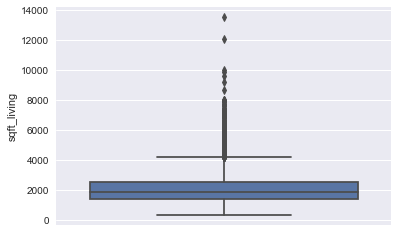

In [19]:
# creating boxplots to see the outliers in the price variable 

plt.figure(figsize=(6,4))
sns.boxplot(y=data['sqft_living']).set_title
plt.show()

In [20]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [21]:
#applying the above function on columns to find the total outliers in every feature
for i in data.columns:
    print('Total outliers in ', i)
    calc_interquartile(data, i)
    print()

Total outliers in  price
Lower outliers 0
Upper outliers 1158
total outliers 1158

Total outliers in  bedrooms
Lower outliers 196
Upper outliers 334
total outliers 530

Total outliers in  bathrooms
Lower outliers 0
Upper outliers 402
total outliers 402

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 571
total outliers 571

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2419
total outliers 2419

Total outliers in  floors
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  condition
Lower outliers 29
Upper outliers 0
total outliers 29

Total outliers in  grade
Lower outliers 270
Upper outliers 1635
total outliers 1905

Total outliers in  yr_built
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  zipcode
Lower outliers 0
Upper outliers 0
total outliers 0



In [22]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 - used 3 here 
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 406
98245.5 97905.5


C:\Users\racar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


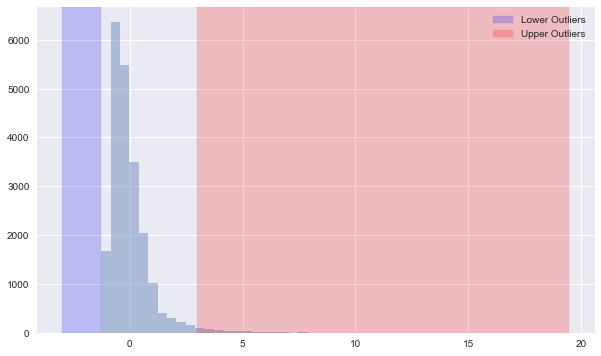

In [23]:
#plotting outliers graph for 'price' feature 
z_score(data, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [24]:
#remove the outliers from price using zscore
dj=[]
for i in data.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
data['P'] = dj

x = data.drop(data[data['P'] == 0.0].index) 
x.shape

(21183, 11)

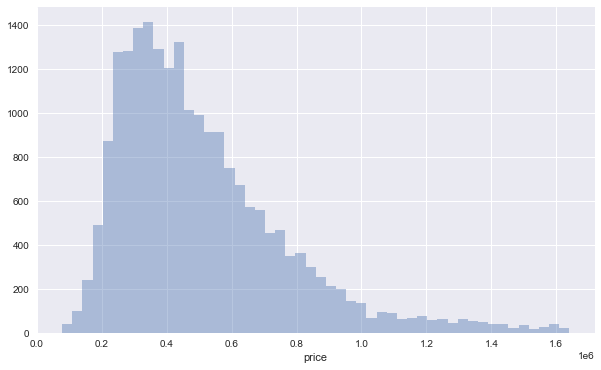

In [25]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

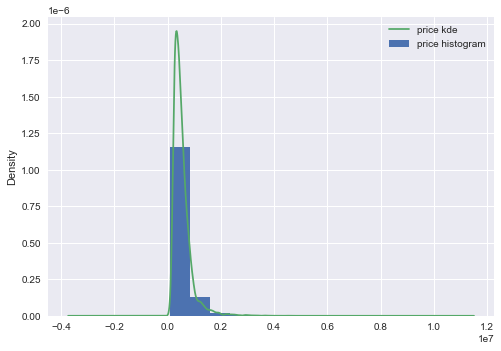

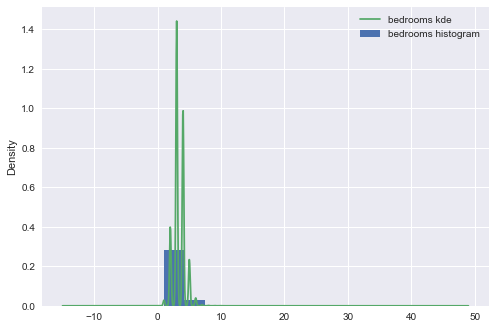

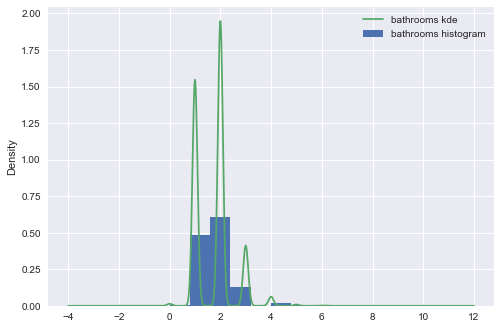

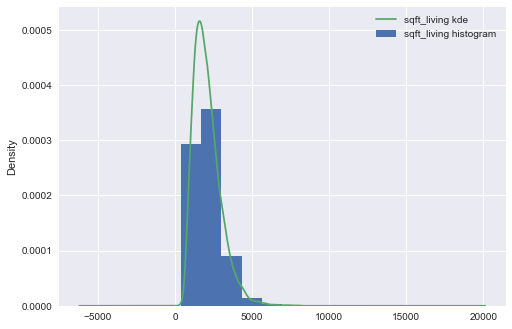

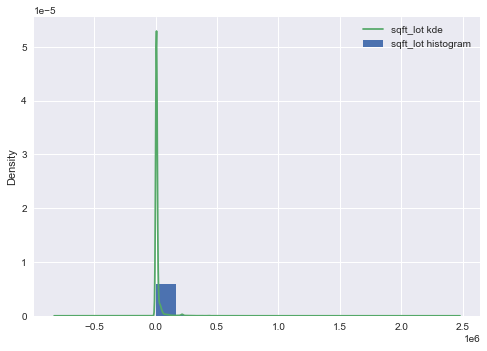

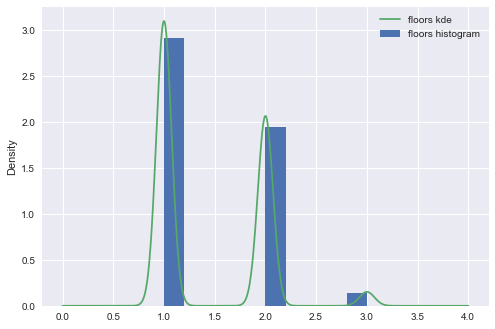

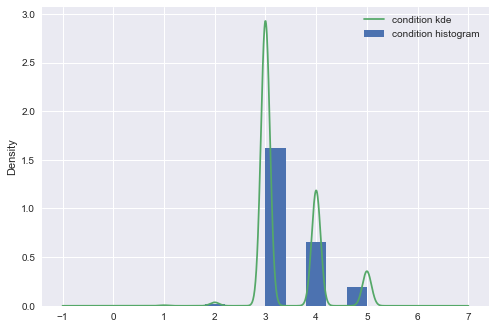

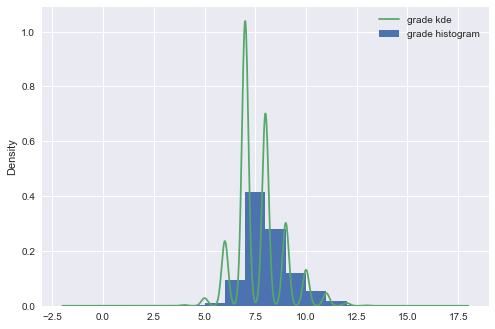

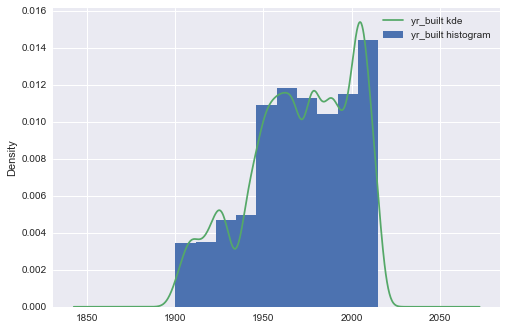

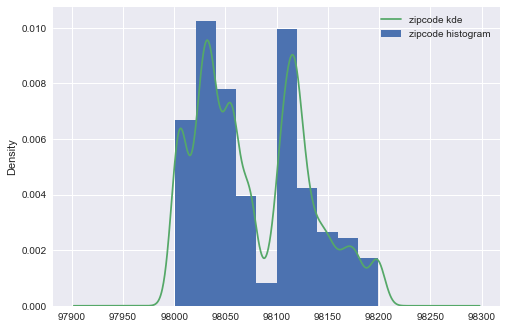

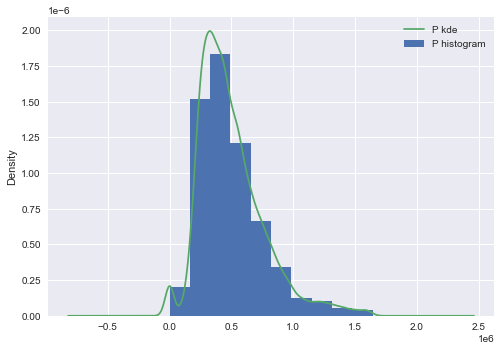

In [26]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [27]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_lot'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sat, 28 May 2022   Prob (F-statistic):           5.85e-40
Time:                        14:48:09   Log-Likelihood:            -3.0719e+05
No. Observations:               21589   AIC:                         6.144e+05
Df Residuals:                   21587   BIC:                         6.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2651.042    199.268      0.000    5.23e+05    5.33e+05
sqft_lot       0.7972      0.060     13.258      0.000       0.679       0.915
==============================================================================
Omnibus:                    19126.972   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1146565.357
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      37.780   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        14:48:09   Log-Likelihood:            -2.9995e+05
No. Observations:               21589   AIC:                         5.999e+05
Df Residuals:                   21587   BIC:                         5.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.404e+04   4411.108     -9.984      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8815      1.940    144.801      0.000     277.079     284.684
==============================================================================
Omnibus:                    14794.997   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542159.026
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.894   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R squared value is between 0  and 1 with a value of 0.493. This is a great sign that the "sqft_lot" coefficient has a strong relationship to sale price aswell as the sqft_lot R squared testing above. This info will add value to further research regarding understanding the relationships connecting Kings County homebuyers' requirements of buying a property. 

In [56]:
#create the column data
data = pd.read_csv('data\\kc_house_data.csv')
continuous = ['price', 'bedrooms', 'bathrooms', 'yr_built']
categoricals = ['sqft_living', 'sqft_lot', 'grade', 'zipcode', 'floors', 'condition']
data_cont = data[continuous]

In [43]:
# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names

In [44]:
# normalize 
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [45]:
# one hot encode categoricals 
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [46]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [47]:
# A train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)
data.fillna(999, inplace=True)

In [61]:
# Your code here
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

221342.5817507725

In [62]:
def kfolds(data, k):
    # push data as pandas DataFrame
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [67]:
data_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [68]:
data_folds = kfolds(data_data, 5)

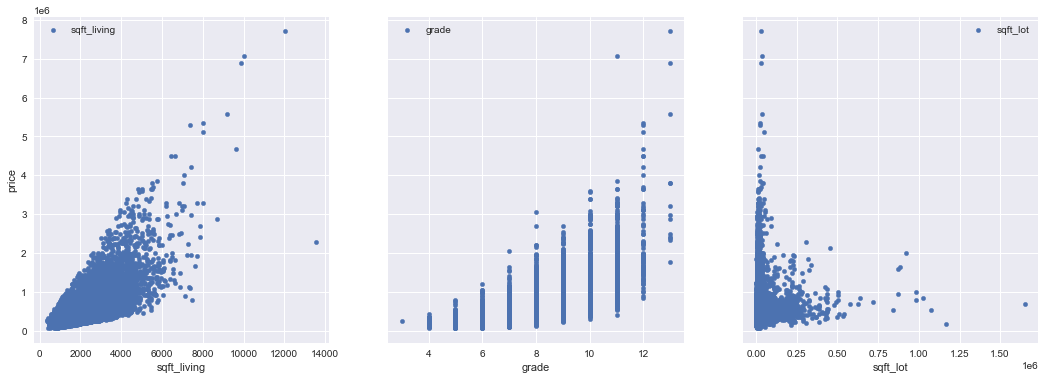

In [69]:
#Created a scatter plot for linearity - Explore 
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'grade', 'sqft_lot']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

As we can see, compared amongst the three variables that the sqft_living relationship is linear in some way across the data. There are some outliers here, however if outliers are removed, you can discern that the size of sqft_lot does have a relationship with price as well as grade and sqft_living. 

   sqft_living
0          370
1        13540
0      59,884.22
1   3,759,093.93
dtype: float64


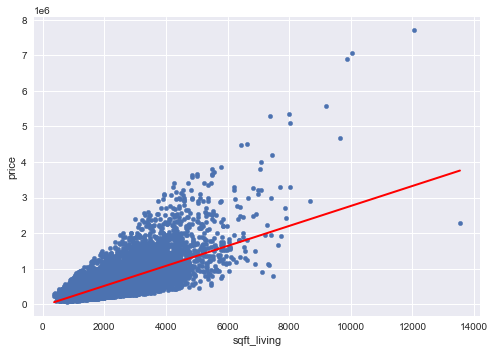

In [70]:
# create a DataFrame with the minimum and maximum values of Sqft_Living - Model 
X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them - Model 
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line - Model 
data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
 
 

In [71]:
# Split the data into training and test sets (assign 20% to test set)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [72]:
# A brief preview of train-test split to create test training data and dummy data set - Explore to Model 
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [73]:
#apply model to the train set created
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [74]:
#calculate training and test MSE
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

211491.33965082662

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data. The mean squared error is used to determine the model's performance.

##Explore: the data set by deriving statistics and creating visualisation with dummy test data

In [75]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [76]:
cv_5_results.mean()

213811.30898585747

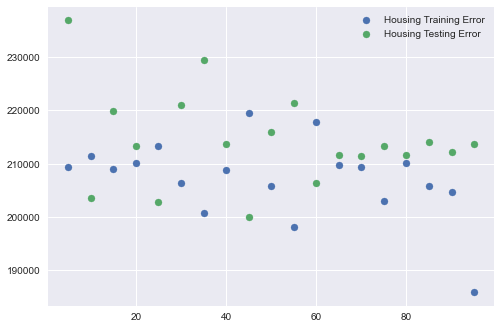

In [77]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

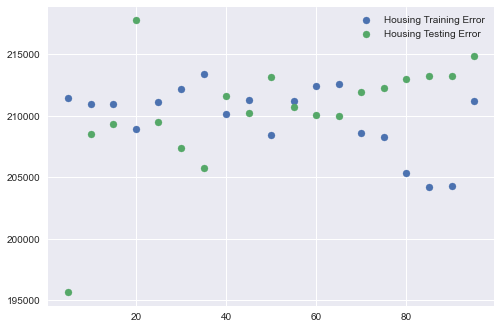

In [78]:
#train set 2 
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

In [109]:
#Paired sample t-test

data = pd.read_csv('data\\kc_house_data.csv')
data[['price','sqft_living', 'sqft_lot']].describe()
ttest,pval = stats.ttest_rel(data['price'], data['sqft_living'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


                                    **  ALTERNATIVE HYPOTHESIS CONFIRMED  ** 

Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - when comparing sqft_lot against sqft_living does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living and sqft_Lot DOES affect a buyers decision when purchasing a home by 

𝜇1≠𝜇2μ1≠μ2
#alpha value is 0.35

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\racar\AppData\Local\Temp/ipykernel_10224/1081638490.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


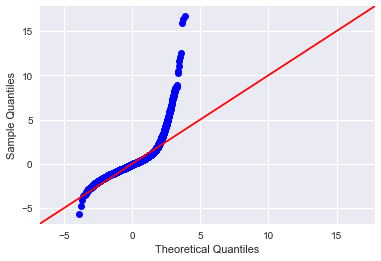

In [110]:
#import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

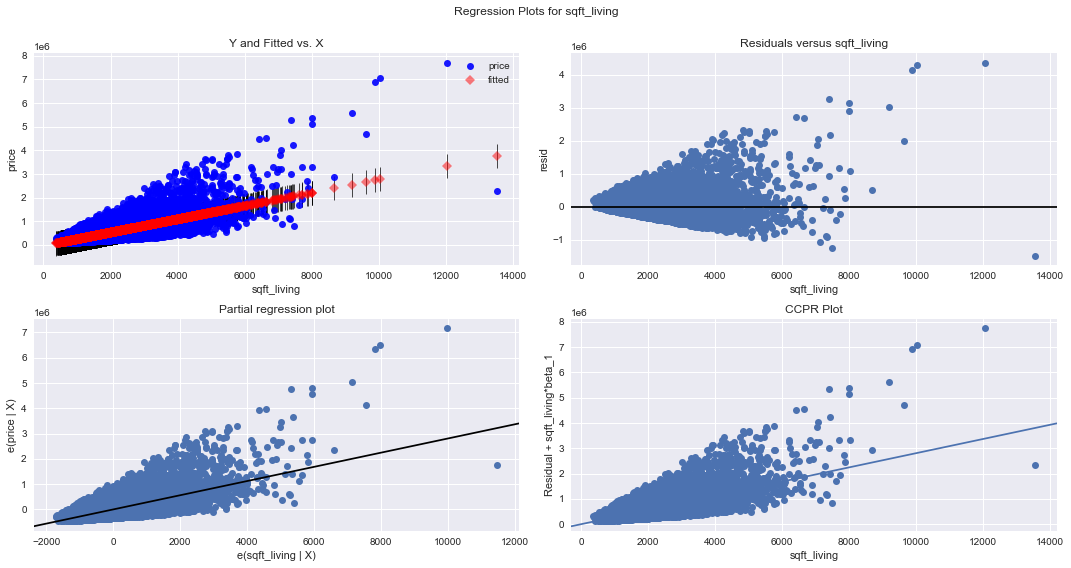

In [111]:
#visualisation used to model and interpret the data 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

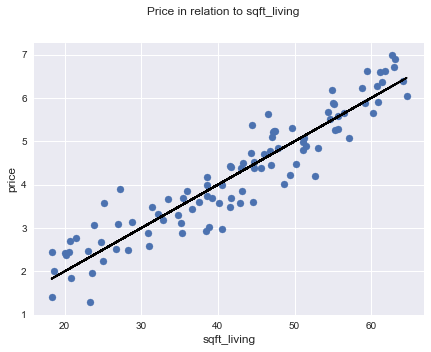

In [94]:
#Visualize price of houses in relation to sqft_living
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Price in relation to sqft_living', fontsize=12)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [95]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,7129300520,10/13/2014,221900,3,1,1180,5650,1,NaN,0,3,7
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,3,7
2,5631500400,2/25/2015,180000,2,1,770,10000,1,0,0,3,6
3,2487200875,12/9/2014,604000,4,3,1960,5000,1,0,0,5,7
4,1954400510,2/18/2015,510000,3,2,1680,8080,1,0,0,3,8


In [96]:
#visualse value of correlation percentage 
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,1,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01
price,-0.02,1,0.31,0.53,0.70,0.09,0.26,0.28,0.40,0.04,0.67
bedrooms,0.00,0.31,1,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36
bathrooms,0.01,0.53,0.51,1,0.76,0.09,0.50,0.07,0.19,-0.13,0.67
sqft_living,-0.01,0.70,0.58,0.76,1,0.17,0.35,0.11,0.28,-0.06,0.76
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1,-0.00,0.02,0.08,-0.01,0.11
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1,0.02,0.03,-0.26,0.46
waterfront,-0.00,0.28,-0.00,0.07,0.11,0.02,0.02,1,0.41,0.02,0.09
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.41,1,0.05,0.25
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1,-0.15


In [98]:
#check for connections 
abs(data_pred.corr()) >= 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,True,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True
sqft_lot,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,False


In [101]:
#Cleaning data 
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# combine the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))
# set index to pairs
data.set_index(['pairs'], inplace = True)
#drop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column to cc 
data.columns = ['cc']
# drop duplicates. 
data.drop_duplicates(inplace=True)

In [106]:
#quick preview to confirm 
data[(data.cc>=.70) & (data.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.76
"(sqft_living, bathrooms)",0.76
"(price, sqft_living)",0.70


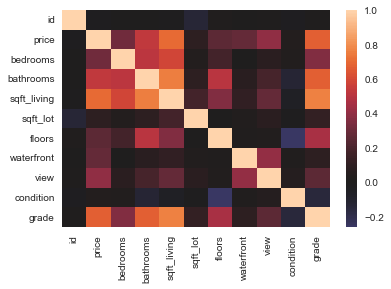

In [107]:
#creating a heatmap to learn even more 
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

Each square shows the correlation between the variables on each axis. Correlation ranges from -2 to +1. Data closer to zero means there is no linear relationship between the two variables.
We add further complexity when connecti. 

In [ ]:
#3 important parameter estimates or statistics.

In [ ]:
#after you finish refining your models, you should provide 1-3 paragraphs discussing your final model

In [ ]:
 #your notebook and presentation should discuss at least two features that have strong relationships with housing prices.